In [1]:
DATA_DIR = 'C:/Users/User/Downloads/saos-dump-23.02.2018.tar/saos-dump-23.02.2018/data/json'

In [2]:
# making usage of my helper .py file in jupyter environment on any computer
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from file_utils import *
data_manager = DataManager(DATA_DIR)

In [3]:
import re
def remove_html(x):
    return re.sub("<[^>]*>", "", x)

def remove_linebreaks(x):
    return re.sub("-\n", "", x)

In [4]:
# %%time

# generator = data_manager.judgments_generator()

# from nltk import sent_tokenize, word_tokenize

# # sentences = []
# text_processed = 0

# with open('sentences.txt', 'w', encoding='utf-8') as the_file:
#     while True:
#         try:
#             content = generator.__next__()
#             text = remove_linebreaks(remove_html(content["textContent"])).lower()
#             text_processed += len(text)

#             for sentence in sent_tokenize(text, language='polish'):
# #                 sentences.append(word_tokenize(sentence))
#                 the_file.write(re.sub( '\s+', ' ', sentence ).strip() + "\n")

#             if text_processed >= 1073741824:
#                 print(text_processed)
#                 break

#         except StopIteration:
#             break

In [5]:
with open('sentences.txt', 'r', encoding='utf-8') as the_file:
    line = the_file.readline()
print(line)

orzeczenie z dnia 28 maja 1986 r. /u 1/86 r./ trybunał konstytucyjny w składzie: przewodniczący: sędzia tk kazimierz działocha sędziowie tk: remigiusz orzechowski, stanisław pawela (sprawozdawca) protokolanci: ewa popławska-kośla i jerzy adam porowski po rozpoznaniu w dniach 25 i 29 kwietnia oraz 28 maja 1986 r. na rozprawie, z udziałem uczestników postępowania: umocowanych przedstawicieli rady ministrów i umocowanego przedstawiciela prokuratora generalnego prl, sprawy z wniosku prezydium wojewódzkiej rady narodowej we wrocławiu o wydanie orzeczenia stwierdzającego niezgodność: a) § 31 rozporządzenia rady ministrów z dnia 16 września 1985 r. w sprawie szczegółowych zasad i trybu oddawania w użytkowanie wieczyste gruntów i sprzedaży nieruchomości państwowych, kosztów i rozliczeń z tym związanych oraz zarządzania sprzedanymi nieruchomościami (dz.u.



In [6]:
%%time

from gensim.models import Phrases, Word2Vec
from gensim.models.phrases import Phraser
from gensim.models.word2vec import LineSentence

sentences = LineSentence('sentences.txt')

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Wall time: 647 ms


In [7]:
%%time
# parse bigrams
bigram = Phraser(Phrases(sentences))
bigram.save("./cache/bigram")

Wall time: 30min 16s


In [8]:
%%time
sentence_stream = [bigram[sentence] for sentence in sentences]
trigram = Phraser(Phrases(sentence_stream))
trigram.save("./cache/trigram")

Wall time: 21min 9s


In [9]:
%%time
model = Word2Vec([trigram[bigram[sentence]] for sentence in sentence_stream], 
                 window=5, size=300, sg=0, workers=os.cpu_count(), min_count=3)
model.save("./cache/model")

Wall time: 37min 31s


In [10]:
model = Word2Vec.load("./cache/model")

for phrase in [
    "sąd_najwyższy",
    "trybunał_konstytucyjny",
    "kodeks_cywilny",
    "kpk",
    "sąd_rejonowy",
    "szkoda",
    "wypadek",
    "kolizja",
    "szkoda_majątkowa",
    "nieszczęście",
    "rozwód"
]:
    print(phrase)
    print(model.wv.most_similar(phrase, topn=3))
    print()


 Sąd Najwyższy
[('sąd_najwyższy,', 0.7859138250350952), ('sąd_najwyższy,_który', 0.7254941463470459), ('naczelny_sąd_administracyjny', 0.6940150260925293)]

 Trybunał Konstytucyjny
[('trybunał', 0.9174637794494629), ('trybunał_konstytucyjny,', 0.8312042951583862), ('sejm', 0.7750335931777954)]

 kodeks cywilny
[('kodeks', 0.751539945602417), ('kodeks_spółek_handlowych', 0.7389832735061646), ('konstytucja', 0.729667067527771)]

 kpk
[('kpk,', 0.8941985368728638), ('k.p.k.,', 0.8694900274276733), ('§_1_kpk', 0.8575173020362854)]

 sąd rejonowy
[('sad_rejonowy', 0.7865809202194214), ('sąd_pierwszej_instancji', 0.7686216831207275), ('sąd_rejonowy,', 0.7503820061683655)]

 szkoda
[('szkoda_ta', 0.8079485893249512), ('powstała_szkoda', 0.7810192108154297), ('szkoda,', 0.7764935493469238)]

 wypadek
[('skutek', 0.6012827754020691), ('przypadek', 0.5835483074188232), ('sam_fakt', 0.5715171694755554)]

 kolizja
[('usterka', 0.715386688709259), ('akcja', 0.7097852826118469), ('awaria', 0.708607

In [14]:
def print_resultant(x, y, z):
    print("%s - %s + %s = " % (x, y, z))
    for result in model.wv.similar_by_vector( model.wv[x] - model.wv[y] + model.wv[z], topn=5):
        print(result)
    print()

print_resultant("sąd_najwyższy", "kpc", "konstytucja")
print_resultant("pasażer", "mężczyzna", "kobieta")
print_resultant("samochód", "droga", "rzeka")

sąd_najwyższy - kpc + konstytucja = 
('sąd_najwyższy', 0.7782818675041199)
('trybunał_konstytucyjny', 0.6183925867080688)
('trybunał', 0.6083720922470093)
('sąd_najwyższy,_który', 0.5794469118118286)
('sad_najwyższy', 0.554322361946106)

pasażer - mężczyzna + kobieta = 
('poszkodowana', 0.5074002742767334)
('powódka_wzajemna', 0.45283037424087524)
('reakcja_żałoby', 0.44502967596054077)
('matka_powódki', 0.4326050281524658)
('infekcja', 0.43229708075523376)

samochód - droga + rzeka = 
('samochód', 0.7904103398323059)
('pojazd', 0.6861567497253418)
('towar', 0.6181960105895996)
('samochód,', 0.612237274646759)
('pojazd_ten', 0.6054666042327881)



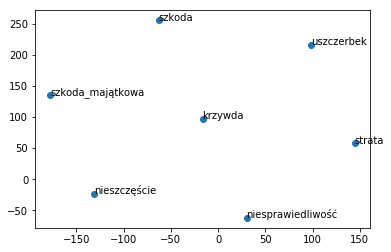

In [30]:
%matplotlib inline
from sklearn.manifold import TSNE
from matplotlib.pyplot import scatter
from matplotlib import pyplot as plt

vectors = [
    model.wv['szkoda'], 
    model.wv['strata'],
    model.wv['uszczerbek'],
    model.wv['szkoda_majątkowa'],
#     model.wv['uszczerbek_na_zdrowiu'],
    model.wv['krzywda'],
    model.wv['niesprawiedliwość'],
    model.wv['nieszczęście']
]

x = TSNE(n_components=2).fit(vectors)
X_transformed = x.fit_transform(vectors)
labels = ['szkoda', 'strata', 'uszczerbek', 'szkoda_majątkowa', 'krzywda', 'niesprawiedliwość', 'nieszczęście']

fig, ax = plt.subplots()
ax.scatter([point[0] for point in X_transformed], [point[1] for point in X_transformed])

for i, txt in enumerate(labels):
    ax.annotate(txt, (X_transformed[i][0], X_transformed[i][1]))